Summary:

What I found:

4 sub-categories are being sold, Chairs, Furnishings, Tables and Bookcases.

Chairs made the most profit, and is 2nd most sold at 2356 sold. furnishings made the 2nd most profit and is most sold at 3563.

Bookcases nearly break-even, is currently at a slight loss with 868 bookcases sold. Tables are sold almost always at a loss, with 1241 tables sold

Sales and quantity have the highest correlation with each other.

Higher sales correlates with higher profits. Higher quantity also does but to a lesser extent.

Shipping methods does not correlating with anything at all, neither does customer segment.

Discounts have negative correlation with profit, higher discount means lower profit

Furnishing is negatively correlated with sales, meaning furnishings indicate low sales

Chairs and Tables both correlate with high sales, but chairs correlates positively with profit while table correlates negatively.

Customers in the central region correlates with higher discounts, while customers from south and west region correlates with slightly higher profits.

What I did:

I imported the data and checked the first 10 rows.

I checked for missing values (none missing)

I printed the number of unique variables for each column to see how many classes are there.

I checked for cases where multiple product names are assigned to the same ID, and vice versa.

I found the mean sales and profits for each sub-categories, and plotted the quantity sold for each sub-category.
Then plotted the distribution of sales and profits by each sub-category using box and whiskers plot.

Then I calculated the overall cumulative sales and profits over time, and plotted them in a time series plot

I also plotted the cumulative sales and profits for individual categories.

To find the correlation, I selected relevant columns and calculated the covariance of each variable. I plotted these in a heat map to see the correlatino between columns.



In [126]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
#Load data
sales = pd.read_csv('store_sales.csv', encoding = 'latin-1')

#Print top 10
sales.iloc[0:10]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [128]:
sales.info()
#No value missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [129]:
print(len(sales))

#See number of unique entries
for i in list(sales):
    print((i,len(sales[i].unique())))

#Row ID is unique for every row,
#Order ID sometimes repeates
#Need to check range of dates
#Only 4 ship modes
#707 unique customers with unique names
#3 different segments
#All from the same country
#Comes from 371 cities
#Spanning 48 states
#454 unique postal codes
#4 regions
#375 different products  sold
#1 Category
#4 sub-categories
#Not sure what sales is
#Quantity is number of product sold
#Not sure how discount is applied
#Not sure how profit is calculated



2121
('Row ID', 2121)
('Order ID', 1764)
('Order Date', 889)
('Ship Date', 960)
('Ship Mode', 4)
('Customer ID', 707)
('Customer Name', 707)
('Segment', 3)
('Country', 1)
('City', 371)
('State', 48)
('Postal Code', 454)
('Region', 4)
('Product ID', 375)
('Category', 1)
('Sub-Category', 4)
('Product Name', 380)
('Sales', 1636)
('Quantity', 14)
('Discount', 11)
('Profit', 1777)


In [130]:
#See why there are more product names than product ID:

#Check each unique ID
for i in sales['Product ID'].unique():
    #See if this ID have more than 1 unique product name
    if len(sales.loc[sales['Product ID'] == i]['Product Name'].unique()) > 1:
        print(i, sales.loc[sales['Product ID'] == i]['Product Name'].unique())

#8 Product ID have multiple products, which is more than 380-375 difference

FUR-FU-10004848 ['Howard Miller 13-3/4" Diameter Brushed Chrome Round Wall Clock'
 'DAX Solid Wood Frames']
FUR-CH-10001146 ["Global Value Mid-Back Manager's Chair, Gray" 'Global Task Chair, Black']
FUR-FU-10004017 ['Tenex Contemporary Contur Chairmats for Low and Medium Pile Carpet, Computer, 39" x 49"'
 'Executive Impressions 13" Chairman Wall Clock']
FUR-FU-10004091 ['Howard Miller 13" Diameter Goldtone Round Wall Clock'
 'Eldon 200 Class Desk Accessories, Black']
FUR-FU-10004864 ['Howard Miller 14-1/2" Diameter Chrome Round Wall Clock'
 'Eldon 500 Class Desk Accessories']
FUR-FU-10001473 ['DAX Wood Document Frame'
 'Eldon Executive Woodline II Desk Accessories, Mahogany']
FUR-FU-10004270 ['Eldon Image Series Desk Accessories, Burgundy'
 'Executive Impressions 13" Clairmont Wall Clock']
FUR-BO-10002213 ['DMI Eclipse Executive Suite Bookcases'
 'Sauder Forest Hills Library, Woodland Oak Finish']


In [131]:
#See if there are IDs with multiple names

#Check unique product names
for i in sales['Product Name'].unique():
    #See product name have more than 1 ID
    if len(sales.loc[sales['Product Name'] == i]['Product ID'].unique()) > 1:
        print(i, sales.loc[sales['Product Name'] == i]['Product ID'].unique())

#3 Product names have multiple IDs. None of these multiple IDs have multiple product names

Staple-based wall hangings ['FUR-FU-10004351' 'FUR-FU-10001940']
Eldon Wave Desk Accessories ['FUR-FU-10000023' 'FUR-FU-10003981']
KI Adjustable-Height Table ['FUR-TA-10004086' 'FUR-TA-10001039']


In [132]:
#Find mean and standard deviations
statistics = sales.describe()
statistics

#Discount ranges between 0 and 0.7, seems a like percentage discount.

#Find Mean for each sub-category
for i in sales['Sub-Category'].unique():
    #Calculate the mean
    mean_sales = sales.loc[sales['Sub-Category'] == i]['Sales'].mean()
    print(f'Mean sales for {i}: {mean_sales:.2f}')

#Find mean profits
mean_profits = 0
#Loop for each sub-category
for i in sales['Sub-Category'].unique():
    mean_profits = sales.loc[sales['Sub-Category'] == i]['Profit'].mean()
    print(f'Mean profit for {i}: {mean_profits:.2f}')

Mean sales for Bookcases: 503.86
Mean sales for Chairs: 532.33
Mean sales for Tables: 648.79
Mean sales for Furnishings: 95.83
Mean profit for Bookcases: -15.23
Mean profit for Chairs: 43.10
Mean profit for Tables: -55.57
Mean profit for Furnishings: 13.65


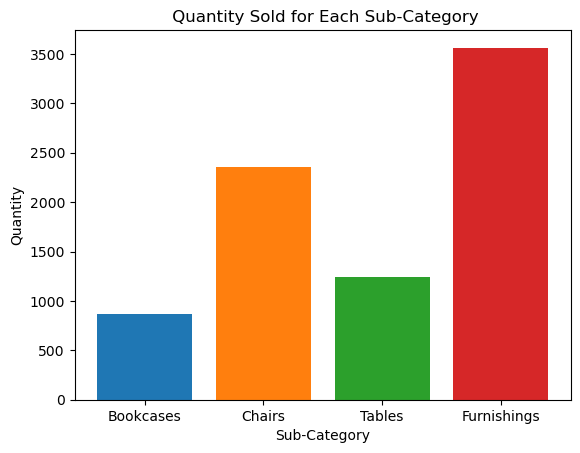

In [133]:
#Plot the number of sub-categories sold
#Loop for each sub-category
for i in sales['Sub-Category'].unique():
    #Plot
    plt.bar(i,sales.loc[sales['Sub-Category']==i]['Quantity'].sum())
    #Print quantity sold
    print(sales.loc[sales['Sub-Category']==i]['Quantity'].sum())
#Labels
plt.title(' Quantity Sold for Each Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.show()

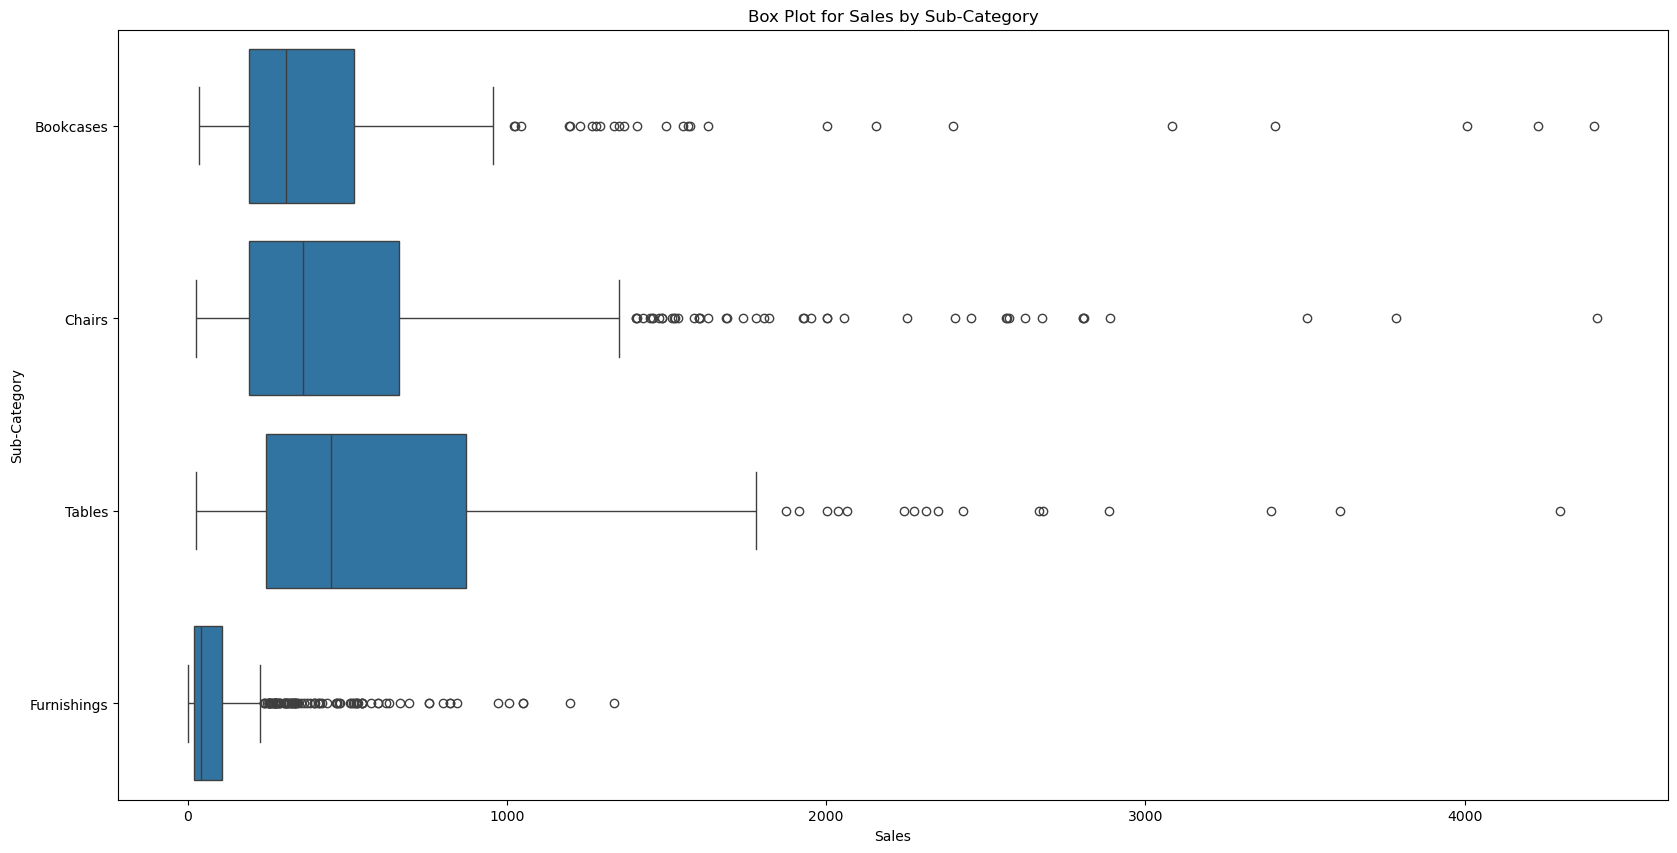

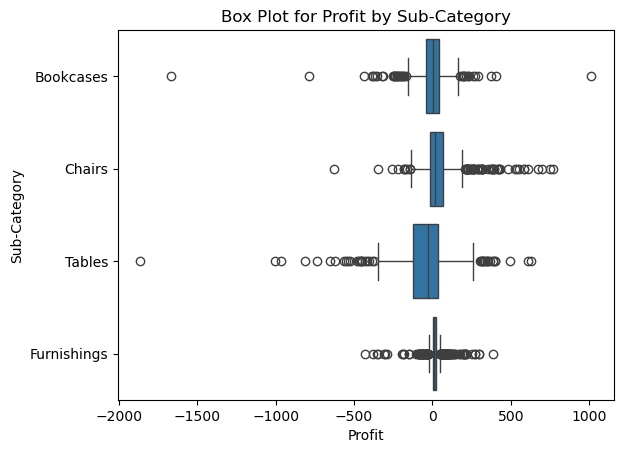

In [176]:
#Plot sales and profits for each sub-category

plt.figure(figsize=(20, 10))
#Plot box plot for sales
sns.boxplot(x='Sales', y='Sub-Category', data=sales)
plt.title('Box Plot for Sales by Sub-Category')
plt.show()

plt.figure(figsize=(20, 10))
#Plot box plot for profit
sns.boxplot(x='Profit', y='Sub-Category', data=sales)
plt.title('Box Plot for Profit by Sub-Category')
plt.show()


In [135]:
#Find cumulative profits by order date
#Convert to machine readable form
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

#Sort from earleist to latest date
sales_by_date = sales.sort_values(by='Order Date')
#Calculate the cumulative profit in a new column
sales_by_date['Cumulative Profit'] = sales_by_date['Profit'].cumsum()
sales_by_date

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cumulative Profit
1577,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,746.4078
1626,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,692.6982
181,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,713.9936
150,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,717.0750
631,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,804.4254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,7637,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,18000.4182
1617,7633,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384,18314.4566
1057,5132,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,18351.8710
1618,7636,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,18439.1552


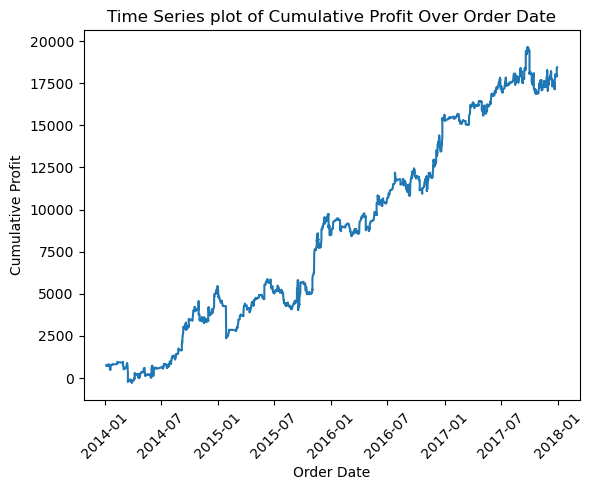

In [136]:
#Plot the CumSum Profit
plt.plot(sales_by_date['Order Date'], sales_by_date['Cumulative Profit'])

#Labels
plt.title('Time Series plot of Cumulative Profit Over Order Date')
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Profit')
plt.show()

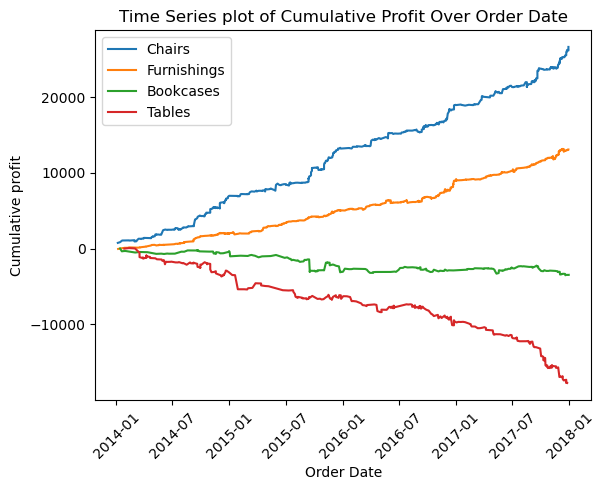

In [177]:
#Plot CumSum by sub-category
for i in sales_by_date['Sub-Category'].unique():
    #Calculate the cumsum
    cumsum = sales_by_date.loc[sales_by_date['Sub-Category'] == i]['Profit'].cumsum()
    #Plot it
    plt.plot(sales_by_date.loc[sales_by_date['Sub-Category'] == i]['Order Date'], cumsum, label=i)


#Labels
plt.title('Time Series plot of Cumulative Profit Over Order Date')
plt.legend()
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative profit')
plt.show()

In [138]:
#Tables are almost always sold at a loss
#Most profit are made from Chairs
#2nd highest profit is furnishings
#Bookcases almost break-even, overall sold at a slight loss

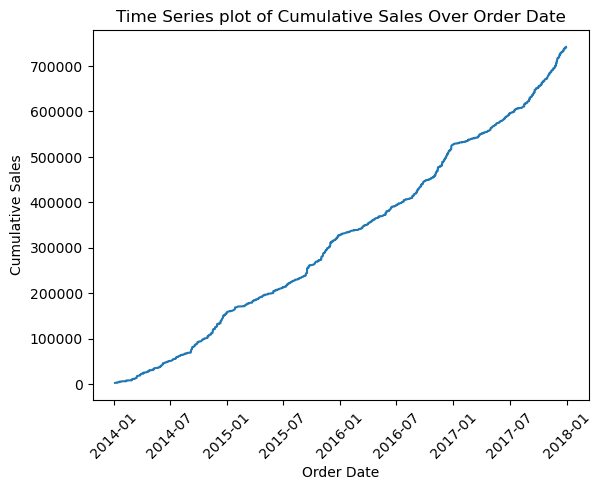

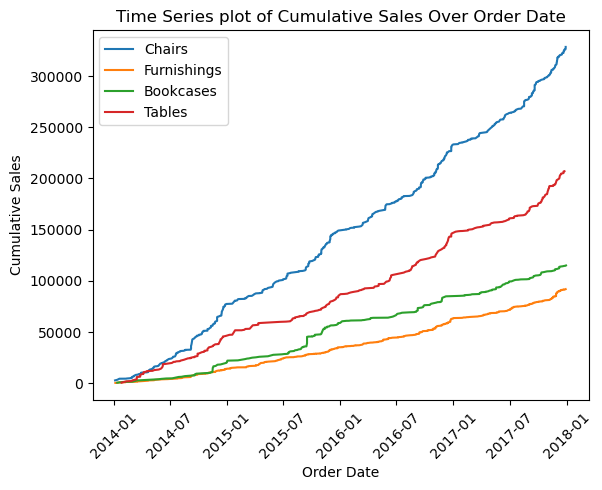

In [139]:
#Plot the cumsum sales, and sales by category
plt.plot(sales_by_date['Order Date'], sales_by_date['Sales'].cumsum())
#Labels
plt.title('Time Series plot of Cumulative Sales Over Order Date')
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Sales')
plt.show()

#Plot the cumsum for each sub-category
for i in sales_by_date['Sub-Category'].unique():
    #Calculate the cumsum
    cumsum = sales_by_date.loc[sales_by_date['Sub-Category'] == i]['Sales'].cumsum()
    #plot
    plt.plot(sales_by_date.loc[sales_by_date['Sub-Category'] == i]['Order Date'], cumsum, label=i)

#labels
plt.title('Time Series plot of Cumulative Sales Over Order Date')
plt.legend()
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Sales')
plt.show()

In [140]:
#Sales seems pretty steady after first year. Gradient does not seem to be increasing much over time, except for increase in sales for tables and chairs at after 2017-07.

In [141]:
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [142]:
#Dropped columns: Row ID, Customer ID, Order ID, Country, Category
sales.drop(['Row ID','Customer ID','Customer Name', 'Order ID','Country','Category'],axis=1, inplace=True)
#Dropped rowID, OrderID and CustomerID since they are created at random, does not give information on other variables
#Dropped Country and Category since only 1 value exist, useless for predictions
#Dropped customer name since we don't want to predict based only on existing customers.


In [143]:
#Find correlation between: ship mode, segment, region, sub-category, sales, quantity, discount, profit
#Since these are general variables we wish to see correlations with.
#Therefore create One-hot encodings representations of:
#Ship Mode, Segment, Region, Sub-category
#Then correlate with Sales, quantity, discount, profit

#Uses one-hot encoding, create new columns and set row as 1 if the same mode is selected, 0 otherwise

#Loop for all modes
for i in sales['Ship Mode'].unique():
    #Check for all rows if the mode is correct for the current mode, write as 1 if equal, 0 otherwise
    sales[f'is_ship_{i}'] = (sales['Ship Mode'] == i).astype(int)
#Loop for all segments
for i in sales['Segment'].unique():
    sales[f'is_segment_{i}'] = (sales['Segment'] == i).astype(int)

#loop for all region
for i in sales['Region'].unique():
    sales[f'is_region_{i}'] = (sales['Region'] == i).astype(int)
#loop for all sub-categories
for i in sales['Sub-Category'].unique():
    sales[f'is_{i}'] = (sales['Sub-Category'] == i).astype(int)

In [171]:
#Informations like specific locations are ignored, since there are too many unique values, and correlations should not be made on a small sample size
#Informations like dates, product names are ignored for the sake of simplicity, want to see overall trends.

#Pull out relavant columns
cov_sales = sales.iloc[:, 11:30]

#Standardize all values, for finding covariance.
for i in list(cov_sales):
    #Applies standardization
    cov_sales[i] = (cov_sales[i] - cov_sales[i].mean())/cov_sales[i].std()
cov_sales

,Sales,Quantity,Discount,Profit,is_ship_Second Class,is_ship_Standard Class,is_ship_First Class,is_ship_Same Day,is_segment_Consumer,is_segment_Corporate,is_segment_Home Office,is_region_South,is_region_West,is_region_East,is_region_Central,is_Bookcases,is_Chairs,is_Tables,is_Furnishings
0,-0.174639,-0.792766,-0.958002,0.244134,1.991317,-1.195357,-0.426835,-0.243747,0.951438,-0.661634,-0.453544,2.320779,-0.70694,-0.628656,-0.541437,2.880749,-0.640348,-0.420645,-0.906519
1,0.759382,-0.348641,-0.958002,1.550047,1.991317,-1.195357,-0.426835,-0.243747,0.951438,-0.661634,-0.453544,2.320779,-0.70694,-0.628656,-0.541437,-0.346968,1.560914,-0.420645,-0.906519
2,1.207806,0.539608,1.520691,-2.879327,-0.501943,0.836175,-0.426835,-0.243747,0.951438,-0.661634,-0.453544,2.320779,-0.70694,-0.628656,-0.541437,-0.346968,-0.640348,2.376182,-0.906519
3,-0.598147,1.427857,-0.958002,0.040207,-0.501943,0.836175,-0.426835,-0.243747,0.951438,-0.661634,-0.453544,-0.430687,1.41388,-0.628656,-0.541437,-0.346968,-0.640348,-0.420645,1.102600
4,2.695559,2.316107,0.143639,0.563104,-0.501943,0.836175,-0.426835,-0.243747,0.951438,-0.661634,-0.453544,-0.430687,1.41388,-0.628656,-0.541437,-0.346968,-0.640348,2.376182,-0.906519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,0.066836,0.095484,0.804624,-0.561339,-0.501943,-1.195357,2.341720,-0.243747,-1.050546,-0.661634,2.203821,-0.430687,-0.70694,-0.628656,1.846065,2.880749,-0.640348,-0.420645,-0.906519
2117,-0.668619,-1.236890,-0.958002,-0.016665,1.991317,-1.195357,-0.426835,-0.243747,-1.050546,1.510697,-0.453544,-0.430687,-0.70694,1.589945,-0.541437,-0.346968,-0.640348,-0.420645,1.102600
2118,-0.524376,-1.236890,-0.958002,0.100372,1.991317,-1.195357,-0.426835,-0.243747,0.951438,-0.661634,-0.453544,2.320779,-0.70694,-0.628656,-0.541437,-0.346968,-0.640348,2.376182,-0.906519
2119,-0.645072,-0.348641,0.143639,-0.033786,1.991317,-1.195357,-0.426835,-0.243747,0.951438,-0.661634,-0.453544,2.320779,-0.70694,-0.628656,-0.541437,-0.346968,-0.640348,-0.420645,1.102600


<Axes: >

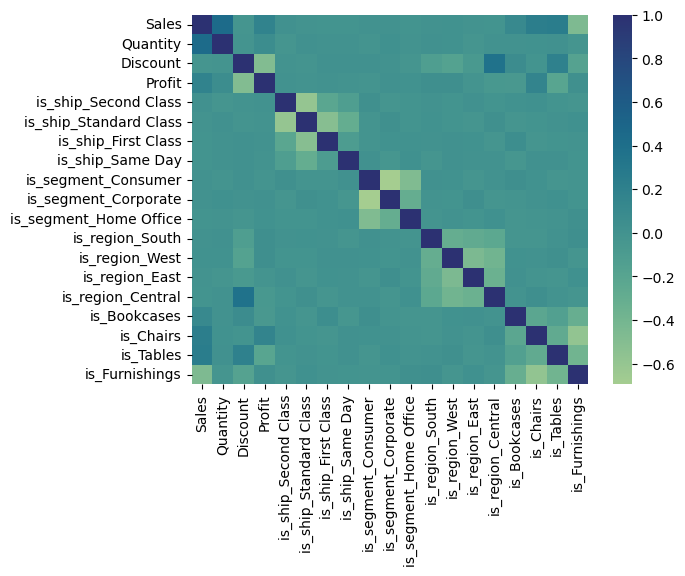

In [172]:
#Plot Covariance
#print(cov_sales.cov())
sns.heatmap(cov_sales.cov(), cmap="crest")

In [ ]:
#Sales have high covariance with quantity. Higher quantity means higher sales
#Higher sales also correlates with higher profit. Higher quantity also does but to a lesser extent.
#Shipping methods does not correlating with anything at all
#Neither does customer segment
#Discounts have negative covariance with profit, higher discount means lower profit
#Furnishing is negatively correlated with sales, meaning furnishings indicate low sales


In [174]:
#Drop irrelevant columns
cov_sales.drop(['is_segment_Consumer','is_segment_Corporate','is_segment_Home Office', 'is_ship_Second Class','is_ship_Standard Class','is_ship_First Class','is_ship_Same Day'],axis=1, inplace=True)

<Axes: >

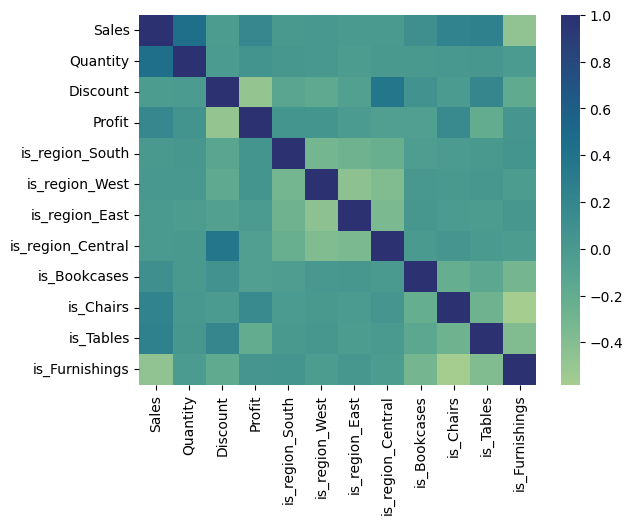

In [175]:
sns.heatmap(cov_sales.cov(), cmap="crest")

In [ ]:
#Tables and chairs correlates to higher sales, while chairs have positive profit and tables have negative profit, consistent with visualizations above
#Tables have the highest discounts, furnishings have the lowest
#Higher discounts are given to the Central region, while slightly more profit is made from the South and West region.
#All regions buy each category equally.